# Assignment III

#### (A) Considering the given double well potential, solve numerically the two lowest Energy states that solve the TDSE.

To do this, I created the potential and Hamiltonian related to the TDSE. After that construction, I solved for the eigenvalues/vectors. Because the typical python E/V solutions take longer, I solved the Hamiltonian E/V using Matlab, since its built-in eig functions were much quicker, more accurate, and more suited than those in numpy's linear algebra or scipy's (I tried both). The generated txt files from that are included in the repository, which I import.

#### (B) Tunneling times.

I will remark on it when I arrive to it, but when the time came I generated the tunneling time using the relevant relationship between E1 and E0. 

#### (C) Animation. 

After having this time, I create the psi function necessary, then animated the probability distribution for 4 tunneling time periods. Note: I often prefer to keep "Tau" as the traditional full-period variable (2pi/delta) instead of just the tunneling time (pi/delta). This is because when I loop the animation, it makes it look cleaner. This was much more accurate that my path integral method, which had a longer tunneling time estimate (by almost exactly 4x).

#### (D) Variations on the double well minima. 

At the end I solve the TDSE and graph the same way (using relevant tunnelling times) for the narrow-barrier, narrow-barrier but 10x taller, and wide barrier problems. I will address this more later.

In [114]:
import sys
sys.modules[__name__].__dict__.clear()

In [303]:
import numpy as np
import matplotlib as mtlb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy as sc
from numpy.linalg import eig
from scipy.sparse.linalg import eigs
from numpy import linalg as LA
import math
from matplotlib import animation
import ffmpeg

In [304]:
L = 10
N = 1001
s = np.linspace(-L,L,N)
ds = s[1]-s[0]
k = 2
alpha = 0.4
m=hb=1
pi=math.pi

In [306]:
e = [1]*N
e2 = [1]*(N-1)
lol = (-2 * np.diag(e) + np.diag(e2,1) + np.diag(e2,-1))/(ds**(2.0))
U=-k*s**2 + alpha*s**4 + 1/alpha
H=((-1.0/2.0)*(hb**(2.0)/m)*lol+ U*np.diag(e))/10000

#### I export this Hamiltonian, and solve/organize the values and vecotrs using matlab, as referenced before. Then I re-import:

In [307]:
Vacc=np.loadtxt("vacc.txt")
Eacc=np.loadtxt("eacc.txt")

In [308]:
print(Eacc)

[1.23443983 1.34685853 3.00930374 4.04300975 5.60401967 7.33405643]


#### Here are the first two eigenvectors, corresponding to E0 and E1 above

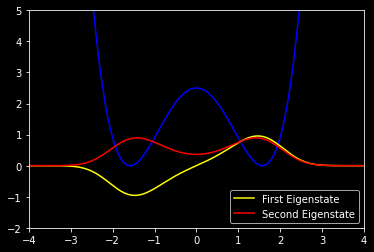

In [309]:
plt.style.use('dark_background')
plt.plot(s,U, color='blue')
plt.plot(s,Vacc[:,1]*10,'yellow',label = "First Eigenstate")
plt.plot(s,Vacc[:,0]*10,'red',label='Second Eigenstate')
plt.xlim(-4,4)
plt.ylim(-2,5)
plt.legend()
plt.show()

#### I included the first 6 eigenmodes since it helps understand the patterns

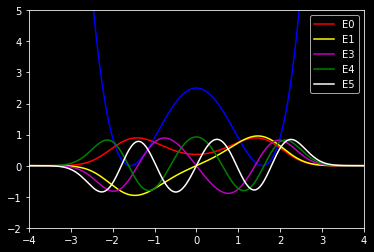

In [310]:
plt.style.use('dark_background')
plt.plot(s,U, color='blue')
plt.plot(s,Vacc[:,0]*10,'r',label='E0')
plt.plot(s,Vacc[:,1]*10,'yellow',label = "E1")
plt.plot(s,Vacc[:,3]*10,'m',label='E3')
plt.plot(s,Vacc[:,4]*10,'g',label='E4')
plt.plot(s,Vacc[:,5]*10,'w',label='E5')
plt.xlim(-4,4)
plt.ylim(-2,5)
plt.legend()
plt.show()

#### Here is part (b), or the solving for b. Like I said, I like to keep Tau as the full period since it's better to animate with. 

In [334]:
dell=Eacc[1]-Eacc[0]
tauy= (2*pi)/dell
print("Tunneling Time : ")
print(tauy/2)

Tunneling Time : 
27.945462775324618


(C) Now it is time to animate. First (for fun) I set up the initial psi just to make sure everything is in order and in the right place. Then, I take the first four periods (4 * tunnel-time) and animate, saving a frame at each step. Note: To make the pattern/distribution easier to see, I scale Psi up a bit. 

In [312]:
psi_initial = (1.0/np.sqrt(2)) * (Vacc[:,0]+Vacc[:,1])

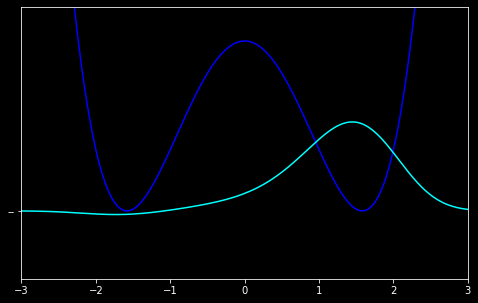

In [329]:
plt.style.use('dark_background')
y = np.transpose(10*psi_initial)
plt.figure(figsize=(8, 5));
plt.plot(s,U,'blue','--',label='V(X)')
plt.plot(s,y, color='aqua')
plt.xlim(-3,3)
plt.ylim(-1,3)
plt.show()

In [321]:
for t in range(112):
    psiy = (1.0/np.sqrt(2))*(np.exp(-1j*Eacc[0]*t))*(Vacc[:,0] + np.exp(-1j*dell*t)*Vacc[:,1])*30
    
    pvy = np.conjugate(psiy) * psiy * 1/LA.norm(psiy)
    
    plt.style.use('dark_background')
    plt.figure(figsize=(5, 3));
    plt.plot(s,np.real(pvy),'gold',label='PSIS')
    plt.plot(s,U,'--',color='red',alpha=0.5)
    plt.xlim(-2.5,2.5)
    plt.ylim(-0,2.5)
    plt.title("Quantum Tunnel --- %.2f" % t);
    plt.legend()
    plt.savefig(r"C:\Users\Sut\Desktop\plotd\graph{t}.png".format(t=t));
    plt.close()

#### (D) Here is an entirely new set of Hamiltonians (once again creating eigs with matlab, everything else here). I solved for a very specific set of barriers, keeping the height the same for narrow/wide, and scaling up * 10 as requested for the narrow barrier. 

In [246]:
import numpy as np
import matplotlib as mtlb
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy as sc
from numpy.linalg import eig
from scipy.sparse.linalg import eigs
from numpy import linalg as LA
import math
from matplotlib import animation
import ffmpeg

In [247]:
bound = 10
N = 1001
x = np.linspace(-bound,bound,N)
dx = x[1]-x[0]
m=hb=1
pi=math.pi

In [248]:
pbn = (1/.387**2)*(x**4-0.7745*x**2+.15) 
pbt =  (10/.387**2)*(x**4-0.7745*x**2+.15) 
pbw = 0.1666*x**4-0.816156*x**2 + 1 

In [249]:
en = [1]*N
e2n = [1]*(N-1)
lapn = (-2 * np.diag(en) + np.diag(e2n,1) + np.diag(e2n,-1))/(dx**(2.0))
Hn=((-1.0/2.0)*(hb**(2.0)/m)*lapn+ pbn*np.diag(en))/10000
Hnt=((-1.0/2.0)*(hb**(2.0)/m)*lapn+ pbt*np.diag(en))/10000
Hw=((-1.0/2.0)*(hb**(2.0)/m)*lapn+ pbw*np.diag(en))/10000

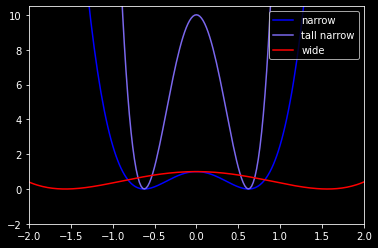

In [340]:
plt.plot(x,pbn,color='blue',label='narrow')
plt.plot(x,pbt,color='mediumslateblue',label='tall narrow')
plt.plot(x,pbw,color='red',label='wide')
plt.legend()
plt.xlim(-2,2)
plt.ylim(-2,10.5)
plt.show()

In [251]:
Vn=np.loadtxt("vn.txt")
En=np.loadtxt("en.txt")
Vnt=np.loadtxt("vnt.txt")
Ent=np.loadtxt("ent.txt")
Vw=np.loadtxt("vw.txt")
Ew=np.loadtxt("ew.txt")

In [345]:
print("Narrow E:")
print(En[1], En[0])
print("Narrow Tall E:")
print(Ent[1], Ent[0])
print("Wide E:")
print(Ew[1], Ew[0])


Narrow E:
3.26406637338587 1.27808805615623
Narrow Tall E:
7.01052674039886 5.78575243988865
Wide E:
0.569835984480349 0.176373592533797


#### So, just like before, I have imported all the E and Vs. I graphed them below to see some patterns (kind of cluttered, more for fun since we can predict many of them

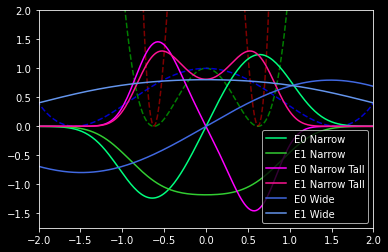

In [252]:
plt.style.use('dark_background')
plt.plot(x,pbn,'--',color='lime', alpha=0.5)
plt.plot(x,pbt,'--',color='red', alpha=0.5)
plt.plot(x,pbw,'--',color='blue', alpha=0.8)
plt.plot(x,Vn[:,1]*10,'springgreen',label = "E0 Narrow")
plt.plot(x,Vn[:,0]*10,'limegreen',label='E1 Narrow')
plt.plot(x,Vnt[:,1]*10,'magenta',label = "E0 Narrow Tall")
plt.plot(x,Vnt[:,0]*10,'deeppink',label='E1 Narrow Tall')
plt.plot(x,Vw[:,1]*10,'royalblue',label = "E0 Wide")
plt.plot(x,Vw[:,0]*10,'cornflowerblue',label='E1 Wide')
plt.ylim(-1.75,2)
plt.xlim(-2,2)
plt.legend()
plt.show()

In [353]:
tau_narrow = (2*pi)/(En[1]-En[0])
dn=(En[1]-En[0])
tau_narrow_tall = (2*pi)/(Ent[1]-Ent[0])
dnt=(Ent[1]-Ent[0])
tau_wide = (2*pi)/(Ew[1]-Ew[0])
dw=(Ew[1]-Ew[0])
print("    Narrow TT        Narrow Tall TT        Wide TT")
print(tau_narrow/2,tau_narrow_tall/2,tau_wide/2)

    Narrow TT        Narrow Tall TT        Wide TT
1.5818866834216945 2.5650380256028282 7.984480138108213


#### Below I do quite a bit, so I'll just explain here. Like before, I import the relevant vectors and construct the psi for the two lowest eigenstates, then develop them using the tunneling times. Because everything is so close with one another, the difference in times aren't as dramatic as other examples. From Luis A. Veguilla-Berdecia's paper TUNNELING IN A QUARTIC, SYMMETRIC, DOUBLE WELL POTENTIAL, however, this sort of makes sense, given the increase in height for the narrow actual at first increases tunneling for a moment. Then, as it continues, it slowly goes down again. But really, the height has suprisingly little impact, at least not even close to the Newtonian intuition. This is principally because multiplying decreases the difference between eigenvalues. Wider takes longer, but keeping the same height means E0 and E1 are closer to the height, so its not as dramatic as the time displayed in the example. I combine the narrow cases because they are similar and I quite liked looking at the comparison, and did the wide seperately because it had a longer period and confused the graphs.

In [301]:
for t in range(513):
    psivn = (1.0/np.sqrt(2))*(np.exp(-1j*En[0]*t/100))*(Vn[:,0] + np.exp(-1j*dn*t/100)*Vn[:,1])
    psivnt = (1.0/np.sqrt(2))*(np.exp(-1j*Ent[0]*t/100))*(Vnt[:,0] + np.exp(-1j*dnt*t/100)*Vnt[:,1])
    
    
    pvn = np.conjugate(psivn) * psivn * 1/LA.norm(psivn)
    pvnt = np.conjugate(psivnt) * psivn * 1/LA.norm(psivnt)
   
    
    y=np.piecewise(x, [x < -.75, ((x >= -.75) & (x < -.5)),((x >= -.5) & (x < .5)),((x >= .5) & (x < .75)),x > .75], [0, -.4, 0,-.4,0])
    z=np.piecewise(x, [x < -.75, ((x >= -.75) & (x < -.5)),((x >= -.5) & (x < .5)),((x >= .5) & (x < .75)),x > .75], [0, -1.0, 0,-1.0,0])

    plt.style.use('dark_background')
    plt.figure(figsize=(5, 3));
    
    plt.plot(x,pbn,'--',color='blue', alpha=0.5)
    plt.plot(x,pbt,'--',color='purple', alpha=0.5)
    plt.plot(x,10*np.real(pvn),'cornflowerblue',label='Narrow Barrier')
    plt.plot(x,10*np.real(pvnt),'darkorchid',label='Tall Narrow Barrier')
    plt.plot(x,z,'purple',alpha=.3)
    plt.plot(x,y,'w',alpha=.5)
    
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-1,1)
    plt.title("Quantum Tunnel Narrow & Tall Barrier - t = %.2f" % t);
    plt.legend()
    plt.savefig(r"C:\Users\Sut\Desktop\plotbb\graph{t}.png".format(t=t));
    plt.close()

In [293]:
for t in range(150):
    psivw = (1.0/np.sqrt(2))*(np.exp(-1j*Ew[0]*t/10))*(Vw[:,0] + np.exp(-1j*dw*t/10)*Vw[:,1])
   
    
    
    pvw = np.conjugate(psivw) * psivw * 1/LA.norm(psivw)
    

    z=np.piecewise(x, [x < -1.8, ((x >= -1.8) & (x < -1.35)),((x >= -1.35) & (x < 1.35)),((x >= 1.35) & (x < 1.8)),x > 1.8], [0, -4, 0,-4,0])

    
    plt.style.use('dark_background')
    plt.figure(figsize=(5, 3));
    
    plt.plot(x,pbw,'--',color='limegreen', alpha=0.8)
    plt.plot(x,10*np.real(pvw),'aquamarine',label='Wide Barrier')
    plt.plot(x,z,'azure',alpha=.3)
    
    
    plt.xlim(-2.5,2.5)
    plt.ylim(-1,1.5)
    plt.title("Quantum Tunnel Wide, S & A --- %.2f" % t);
    plt.legend()
    plt.savefig(r"C:\Users\Sut\Desktop\plotw\graph{t}.png".format(t=t));
    plt.close()